Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



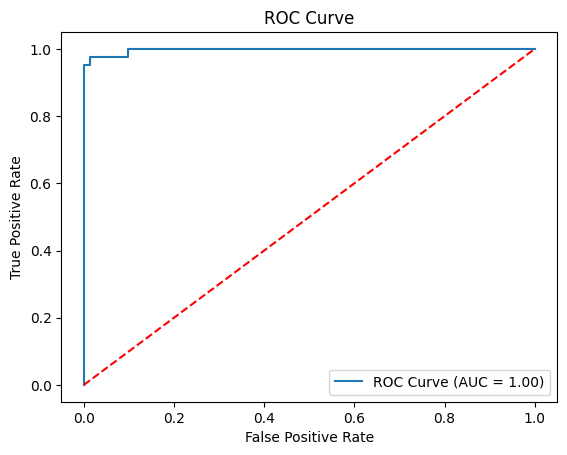

In [2]:
# Task 4: Logistic Regression - Breast Cancer Classification

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 📥 Step 2: Load Dataset
df = pd.read_csv("data.csv")  # Download from Kaggle and upload locally
df.head()

# 🔍 Step 3: Preprocess Data
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Convert target to numeric
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🤖 Step 4: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 🔮 Step 5: Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 📊 Step 6: Evaluate Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
